<a href="https://colab.research.google.com/github/Rahul2661998/Capstone-Project-Ted-Talk-Views-Prediction-/blob/main/Ted_Talk_Views_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##***TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates. The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.***

##***Attribute / Description /Data Type***

***talk_id Talk / identification
number provided by
TED / int***

***title / Title of the talk string
speaker_1 First speaker in TED's
speaker list / string***

***speakers / Speakers in the talk dictionary***

***occupations *Occupations of the
speakers / dictionary***

***about_speakers / *Blurb about each
speaker / dictionary***

***views(Dependent
Variable) / Count of views / int***

***recorded_date / Date the talk was
recorded / string*** 

***published_date / Date the talk was
published to TED.com / string***

***event / Event or medium in
which the talk was given / string***

***native_lang / Language the talk was
given in / string***

***available_lang / All available languages
(lang_code) for a talk / list***

***comments / Count of comments / int***

***duration / Duration in seconds / int***

***topics / Related tags or topics for the talk / list***

***related_talks / Related talks
(key='talk_id',
value='title') / dictionary***

***url / URL of the talk / string***

***description / Description of the talk / string***

***transcript / Full transcript of the talk / string***

****The dictionary key maps to the speaker in ‘speakers’.***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.set() 

In [2]:
raw_data=pd.read_csv("/content/drive/MyDrive/Alma Better/Capstone Project Regression Model/Copy of data_ted_talks.csv")

In [3]:
raw_data.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [4]:
# checking for null values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [7]:
raw_data.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [9]:
# Duplicate values check
print(raw_data.duplicated().sum())

0


In [11]:
raw_data.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


## Lets first take a look at continuous variables

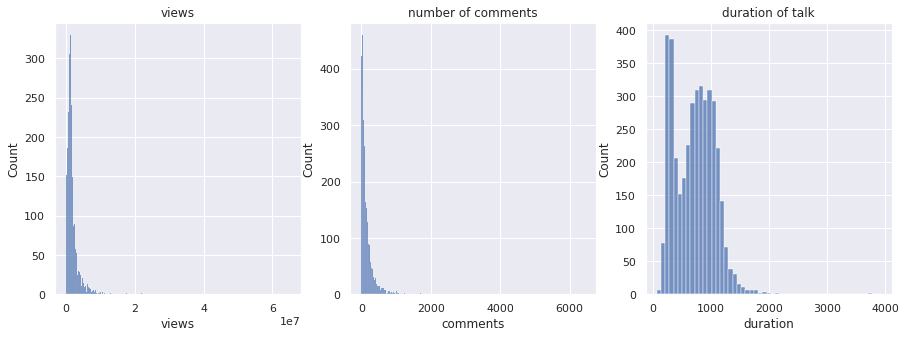

In [18]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("views")
sns.histplot(x= raw_data['views'])

plt.subplot(1,3,2)
plt.title("number of comments")
sns.histplot(x= raw_data['comments'])

plt.subplot(1,3,3)
plt.title("duration of talk")
sns.histplot(x= raw_data['duration'])

plt.show()

In [19]:
# removing outliers for views
q=raw_data['views'].quantile(0.99)
data_1=raw_data[raw_data['views']<q]

In [20]:
# removing outliers for comments
q=data_1['comments'].quantile(0.99)
data_2=data_1[data_1['comments']<q]

In [21]:
# removing outliers for duration
q=data_2['duration'].quantile(0.99)
data_3=data_2[data_2['duration']<q]

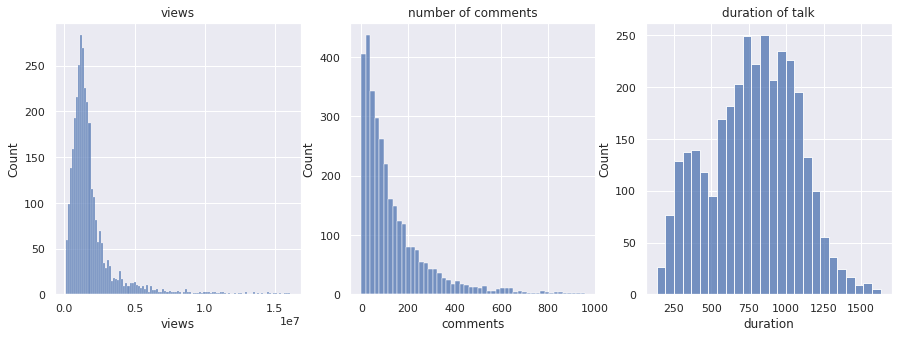

In [26]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("views")
sns.histplot(x= data_3['views'])

plt.subplot(1,3,2)
plt.title("number of comments")
sns.histplot(x= data_3['comments'])

plt.subplot(1,3,3)
plt.title("duration of talk")
sns.histplot(x= data_3['duration'])

plt.show()

In [ ]:
data_3['log_views']=np.log(data_3['views'])
data_3['log_comments']=np.log(data_3['comments'])
data_3['log_duration']=np.log(data_3['duration'])

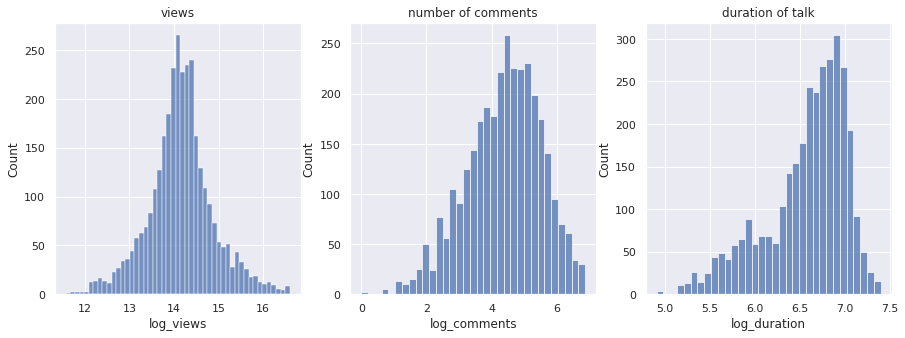

In [28]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("views")
sns.histplot(x= data_3['log_views'])

plt.subplot(1,3,2)
plt.title("number of comments")
sns.histplot(x= data_3['log_comments'])

plt.subplot(1,3,3)
plt.title("duration of talk")
sns.histplot(x= data_3['log_duration'])

plt.show()

## Next lets look at the catagorical variables

In [29]:
data_3.describe(include='all')

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,comments,duration,topics,related_talks,url,description,transcript,log_views,log_comments,log_duration
count,3249.000000,3249,3249,3249,3243,3244,3.249000e+03,3248,3249,3249,...,3249.000000,3249.000000,3249,3249,3249,3249,3249,3249.000000,3249.000000,3249.000000
unique,NaN,3249,2785,2810,1953,2808,NaN,854,2865,419,...,NaN,NaN,3242,3249,3249,3249,3249,NaN,NaN,NaN
top,NaN,Averting the climate crisis,Hans Rosling,{0: 'Juan Enriquez'},{0: ['writer']},{0: 'Juan Enriquez thinks and writes about the...,NaN,2018-04-10,2007-04-05,TED2018,...,NaN,NaN,"['design', 'entertainment', 'live music', 'mus...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",NaN,NaN,NaN
freq,NaN,1,10,9,48,9,NaN,95,19,95,...,NaN,NaN,2,1,1,1,1,NaN,NaN,NaN
mean,8963.860880,NaN,NaN,NaN,NaN,NaN,1.874075e+06,NaN,NaN,NaN,...,137.754694,776.246845,NaN,NaN,NaN,NaN,NaN,14.159140,-inf,6.564019
std,15724.276888,NaN,NaN,NaN,NaN,NaN,1.801393e+06,NaN,NaN,NaN,...,151.065156,293.893025,NaN,NaN,NaN,NaN,NaN,0.733055,NaN,0.458205
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.065450e+05,NaN,NaN,NaN,...,0.000000,135.000000,NaN,NaN,NaN,NaN,NaN,11.576323,-inf,4.905275
25%,1106.000000,NaN,NaN,NaN,NaN,NaN,9.537060e+05,NaN,NaN,NaN,...,37.000000,570.000000,NaN,NaN,NaN,NaN,NaN,13.768111,3.610918,6.345636
50%,2003.000000,NaN,NaN,NaN,NaN,NaN,1.398229e+06,NaN,NaN,NaN,...,86.000000,792.000000,NaN,NaN,NaN,NaN,NaN,14.150717,4.454347,6.674561
75%,3574.000000,NaN,NaN,NaN,NaN,NaN,2.047296e+06,NaN,NaN,NaN,...,180.000000,997.000000,NaN,NaN,NaN,NaN,NaN,14.532030,5.192957,6.904751


In [ ]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("views")
sns.histplot(x= data_3['log_views'])

plt.subplot(1,3,2)
plt.title("number of comments")
sns.histplot(x= data_3['log_comments'])

plt.subplot(1,3,3)
plt.title("duration of talk")
sns.histplot(x= data_3['log_duration'])

plt.show()